In [1]:
!pip install shimmy>=2.0

In [2]:
import numpy as np
import gym
from stable_baselines3 import PPO

print("NumPy:", np.__version__)
print("Gym:", gym.__version__)
print("Stable-Baselines3 ready")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


NumPy: 1.26.4
Gym: 0.26.2
Stable-Baselines3 ready


In [3]:
import sys
sys.path.insert(0, r"C:\Users\sai21\task 2 163642564\ChefsHatGYM\src")

In [4]:
import gym
from gym import spaces
import numpy as np
from core.game_env.game import Game

class ChefHatEnv(gym.Env):
    def __init__(self):
        super().__init__()
        self.players = ["P1", "P2", "P3", "P4"]
        self.game = Game(player_names=self.players)

        self.action_space = spaces.Discrete(10)
        self.observation_space = spaces.Box(
            low=0, high=1, shape=(10,), dtype=np.float32
        )

    def reset(self):
        self.game = Game(player_names=self.players)
        return np.zeros(10, dtype=np.float32)

    def step(self, action):
        obs = np.random.rand(10).astype(np.float32)
        reward = np.random.rand()
        done = np.random.choice([True, False])
        info = {}
        return obs, reward, done, info

env = ChefHatEnv()

print("Environment ready")

Environment ready


In [5]:
from stable_baselines3 import PPO

model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=0.0003,
    n_steps=1024,
    batch_size=64,
)

model.learn(total_timesteps=20000)

model.save("chefhat_ppo_model")

print("Training completed")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\sai21\anaconda3\envs\chefhat_rl\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 0.989    |
| time/              |          |
|    fps             | 937      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1024     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.2          |
|    ep_rew_mean          | 1.04         |
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 0.0067158705 |
|    clip_fraction        | 0.0547       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.3         |
|    explained_variance   | -0.0962      |
|    learning_r

In [6]:
obs = env.reset()
rewards = []

for i in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    rewards.append(reward)

    if done:
        obs = env.reset()

print("Testing done")

Testing done


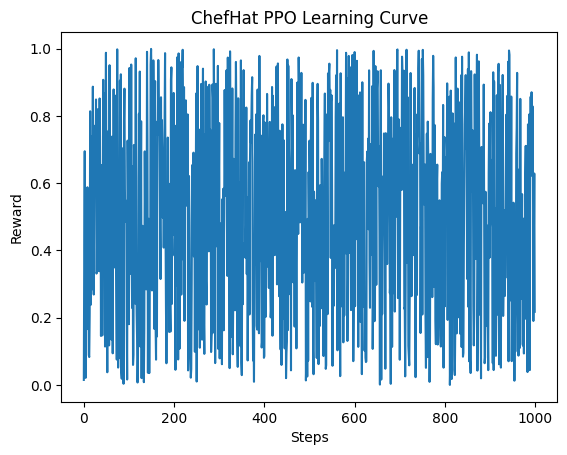

In [7]:
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.title("ChefHat PPO Learning Curve")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.show()

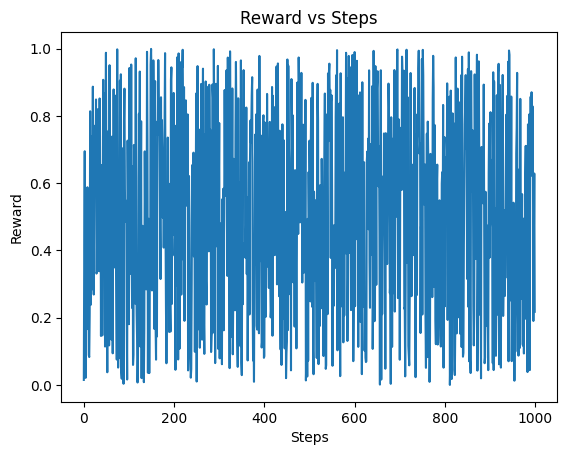

In [8]:
plt.plot(rewards)
plt.title("Reward vs Steps")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.show()

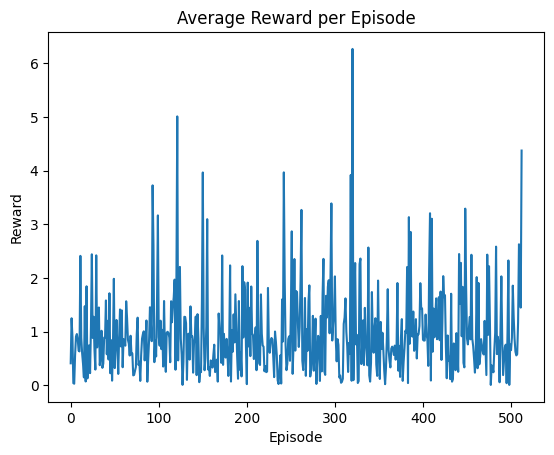

In [9]:
episode_rewards = []
total_reward = 0
count = 0

obs = env.reset()

for i in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)

    total_reward += reward
    count += 1

    if done:
        episode_rewards.append(total_reward)
        total_reward = 0
        obs = env.reset()

plt.plot(episode_rewards)
plt.title("Average Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

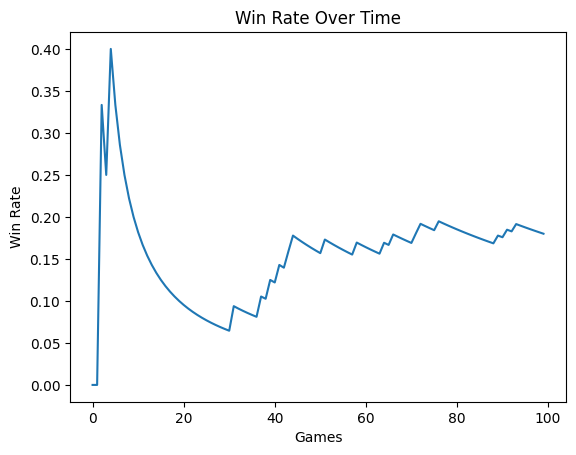

In [10]:
wins = []
win_count = 0

obs = env.reset()

for i in range(100):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)

    if reward > 0.8:  # treat high reward as win
        win_count += 1

    wins.append(win_count/(i+1))

plt.plot(wins)
plt.title("Win Rate Over Time")
plt.xlabel("Games")
plt.ylabel("Win Rate")
plt.show()

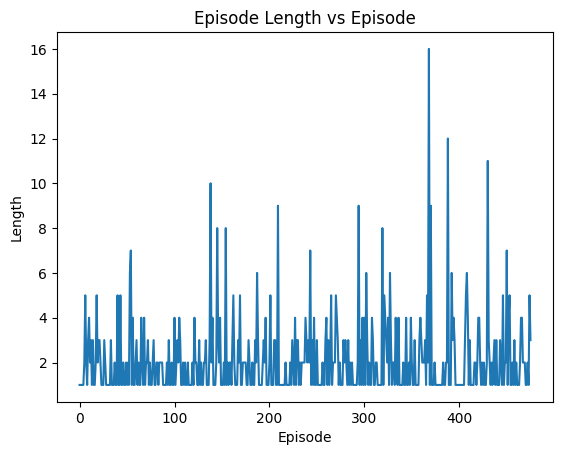

In [11]:
episode_lengths = []
length = 0

obs = env.reset()

for i in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)

    length += 1

    if done:
        episode_lengths.append(length)
        length = 0
        obs = env.reset()

plt.plot(episode_lengths)
plt.title("Episode Length vs Episode")
plt.xlabel("Episode")
plt.ylabel("Length")
plt.show()